Set up the PYTHONPATH so it can find the python modules we'll be using.

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))

Import the geometry module

In [2]:
import geometry as geo

Set the base resolution that will be used throughout

In [3]:
minres = 10.0

In [4]:
geo.SlabSpline?

Init signature: geo.SlabSpline(xs, ys, res=None, name=None, sid=None, bctype='natural')
Docstring:      <no docstring>
File:           ~/Documents/Fenicsx-subduction/python/geometry.py
Type:           type
Subclasses:     

In [5]:
slab = geo.SlabSpline([0.0, 140.0, 240.0, 400.0], [0.0, -70.0, -120.0, -200.0], 
                       res=[2*minres, 1*minres, 1*minres, 6*minres], sid=1, name="Slab")
print(len(slab.points))

4


/Users/kteshome/anaconda3/envs/fenicsx2-env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [6]:
# add partial coupling depths
slab.addpoint(80, "Slab::PartialCouplingDepth", res=1*minres)
slab.addpoint(82.5, "Slab::FullCouplingDepth", res=1*minres)
print(len(slab.points))

6


In [7]:
geo.SubductionGeometry?

Init signature: geo.SubductionGeometry(slab_spline, **kwargs)
Docstring:      <no docstring>
Init docstring:
Initialize the subduction geometry with the current values of:
* slab_spline:          SlabSpline object describing the slab
* coast_distance (>=0): distance from the trench that the coast is located,
                        does nothing if ==0.0 and the trench is at 0.0 depth
* extra_width (>=0):    extra width of domain beyond the final slab point,
                        does nothing if ==0.0
* slab_side_sid:        surface id of vertical side on slab side of domain
* wedge_side_sid:       surface id of vertical side on wedge side of domain
* slab_base_sid:        surface id of base of slab region of domain
* wedge_base_sid:       surface id of base of wedge region of domain,
                        only used if extra_width > 0.0
* coast_sid:            surface id of line between trench and coast,
                        only used if coast_distance > 0.0 or the slab trench is

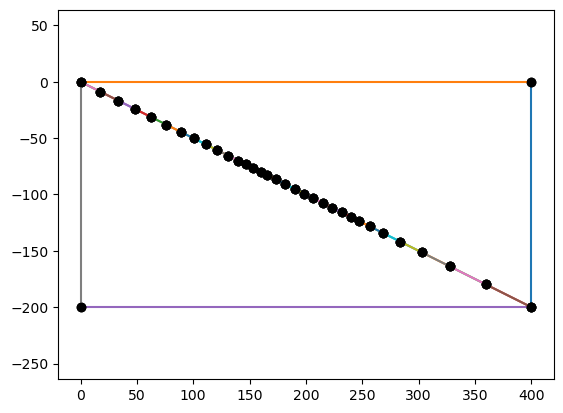

In [8]:
geom = geo.SubductionGeometry(slab, slab_rid=1, wedge_rid=2, 
                                    slab_side_sid=2, wedge_side_sid=3, slab_base_sid=7, 
                                    wedge_base_sid=8, coast_sid=11, top_sid=12,
                                    wedge_top_res=4*minres, slab_base_res=6*minres)
geom.plot()

['WedgeSide', 'LowerCrust']
7


/Users/kteshome/anaconda3/envs/fenicsx2-env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


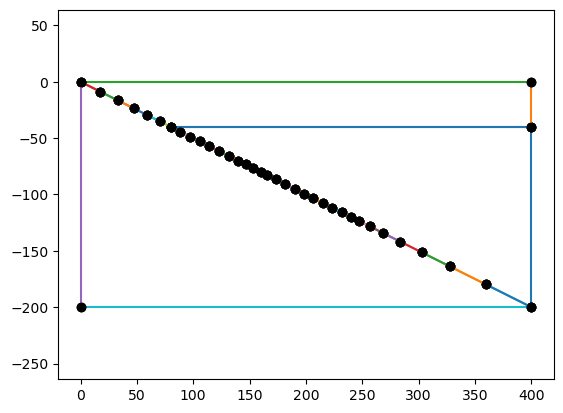

In [9]:
geom.addcrustlayer(40, "LowerCrust", sid=9, rid=3, slab_res=1*minres, side_res=16*minres, side_sid=5)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
print(len(slab.points))
geom.plot()


['WedgeSide', 'LowerCrust', 'UpperCrust']


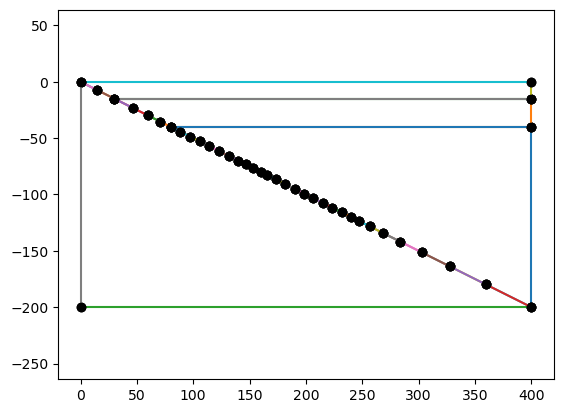

In [10]:
geom.addcrustlayer(15,"UpperCrust", sid=10, rid=4, slab_res= 2*minres, side_res=4*minres, side_sid=6)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
geom.plot()

['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


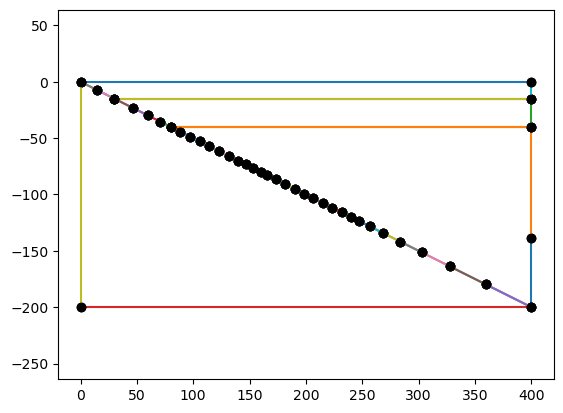

In [11]:
geom.addwedgesidepoint(139, "WedgeSide::InOut", line_name="UpperWedgeSide", res=4*minres, sid=4)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


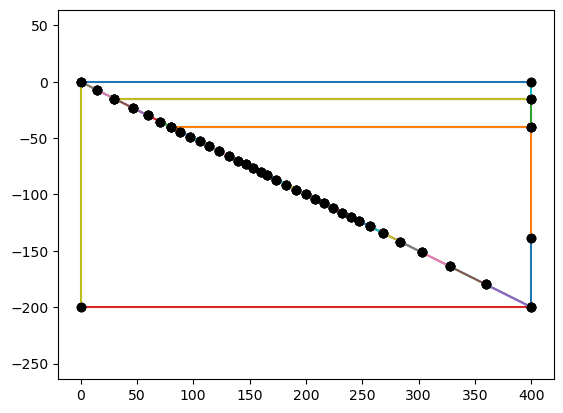

In [12]:
geom.addslabpoint(100, "Slab::DetectorPoint", res=1*minres, sid=1)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


In [13]:
mesh, ct, ft = geom.generatemesh()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 20%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 20%] Meshing curve 9 (Line)
Info    : [ 30%] Meshing curve 10 (Line)
Info    : [ 30%] Meshing curve 11 (Line)
Info    : [ 30%] Meshing curve 12 (Line)
Info    : [ 30%] Meshing curve 13 (Line)
Info    : [ 40%] Meshing curve 14 (Line)
Info    : [ 40%] Meshing curve 15 (Line)
Info    : [ 40%] Meshing curve 16 (Line)
Info    : [ 40%] Meshing curve 17 (Line)
Info    : [ 40%] Meshing curve 18 (Line)
Info    : [ 50%] Meshing curve 19 (Line)
Info    : [ 50%] Meshing curve 20 (Line)
Info    : [ 50%] Meshing curve 21 (Line)
Info    : [ 50%] Meshing curve 22 (Line)
Info    : [ 60%] Meshing curve 23 (Line)
Info    : [ 60%] Meshing curve 24 (Line)
I


No module named 'trame'

Falling back to a static output.
  warnings.warn(



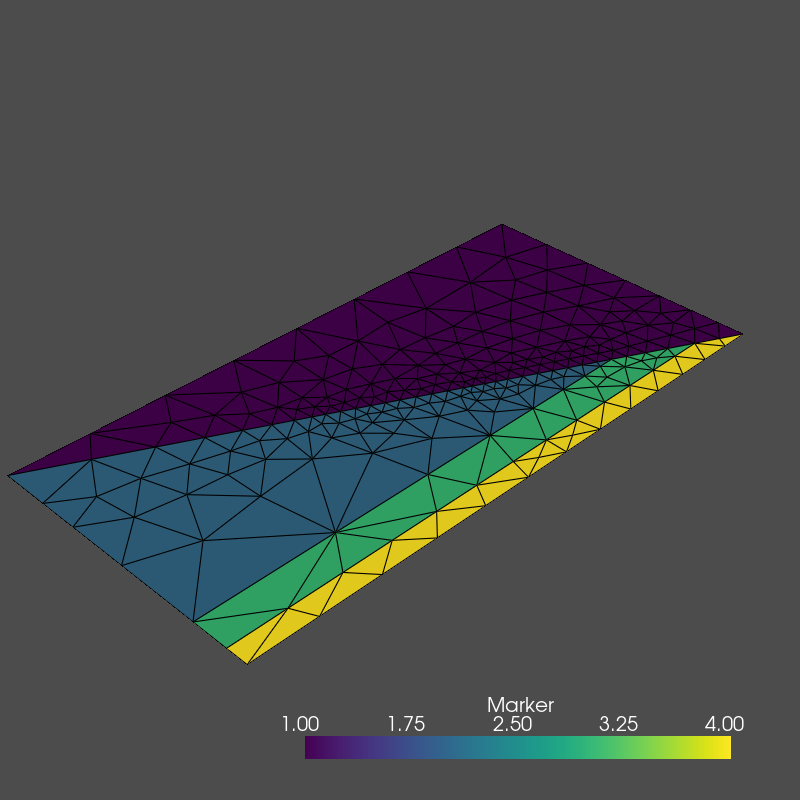

In [14]:
import pyvista
pyvista.start_xvfb()
from dolfinx.plot import create_vtk_mesh
topology, cell_types, x = create_vtk_mesh(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(topology, cell_types, x)
num_local_cells = mesh.topology.index_map(mesh.topology.dim).size_local
grid.cell_data["Marker"] = ct.values[ct.indices<num_local_cells]
grid.set_active_scalars("Marker")

p = pyvista.Plotter(window_size=[800, 800])
p.add_mesh(grid, show_edges=True)
p.show()

In [15]:
import dolfinx
import numpy as np
import ufl
from dolfinx.fem import Function, FunctionSpace, dirichletbc, locate_dofs_geometrical, locate_dofs_topological, form

Ps2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Ps1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
Ve = FunctionSpace(mesh, Ps2)
Pe = FunctionSpace(mesh, Ps1)
THs = Ps2 * Ps1
Vs = FunctionSpace(mesh, THs)

(v_as, p_as) = ufl.TrialFunctions(Vs)
(v_ts, p_ts) = ufl.TestFunctions(Vs)

Vs0, _ = Vs.sub(0).collapse()
Vs00, _ = Vs0.sub(0).collapse()
Vs01, _ = Vs0.sub(1).collapse()
Vs1, _ = Vs.sub(1).collapse()

Pw2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Pw1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
Vwe = FunctionSpace(mesh, Pw2)
Pwe = FunctionSpace(mesh, Pw1)
THw = Pw2 * Pw1
Vw = FunctionSpace(mesh, THw)

(v_aw, p_aw) = ufl.TrialFunctions(Vw)
(v_tw, p_tw) = ufl.TestFunctions(Vw)

Vw0, _ = Vw.sub(0).collapse()
Vw00, _ = Vw0.sub(0).collapse()
Vw01, _ = Vw0.sub(1).collapse()
Vw1, _ = Vw.sub(1).collapse()


Vt = FunctionSpace(mesh, (ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)))
T_a = ufl.TrialFunction(Vt)
T_t = ufl.TestFunction(Vt)



In [16]:
slab_surface_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 1, ft.find(1))
slab_surface_dofs_Vs0[0].size

138

In [17]:
slab_surface_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 1, ft.find(1))
slab_surface_dofs_Vs1[0].size

35

In [18]:
slab_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(1))
slab_surface_dofs_Vw0[0].size

138

In [19]:
upperWedgeSide_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, np.concatenate((ft.find(4), ft.find(5), ft.find(6))))

In [20]:
top_surface_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(12))

In [21]:
slab_side_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(2))

In [22]:
top_wedge_dofs_Vw0  = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(9))

In [23]:
All_except_slab_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [24]:
NonSlab_dofs_Vs0_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs0[0]) if dof not in slab_surface_dofs_Vs0[0]]
NonSlab_dofs_Vs0 = [All_except_slab_dofs_Vs0[i][NonSlab_dofs_Vs0_indices] for i in range(len(All_except_slab_dofs_Vs0))]

In [25]:
All_except_slab_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [26]:
NonSlab_dofs_Vs1_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs1[0]) if dof not in slab_surface_dofs_Vs1[0]]
NonSlab_dofs_Vs1 = [All_except_slab_dofs_Vs1[i][NonSlab_dofs_Vs1_indices] for i in range(len(All_except_slab_dofs_Vs1))]

In [27]:
All_except_slab_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [28]:
NonSlab_dofs_Vw0_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vw0[0]) if dof not in slab_surface_dofs_Vw0[0]]
NonSlab_dofs_Vw0 = [All_except_slab_dofs_Vw0[i][NonSlab_dofs_Vw0_indices] for i in range(len(All_except_slab_dofs_Vw0))]

In [29]:
zero_v = Function(Vw0)
zero_v.x.set(0.0)
bc_WedgeTop = dirichletbc(zero_v, top_wedge_dofs_Vw0)


In [30]:
Te = Function(Vt)
Te.x.set(0.0)
bc_Ttop = dirichletbc(Te, top_surface_dofs_Vt)

In [31]:
zero_vs = Function(Vs0)
zero_vs.x.set(0.0)
bc_NonSlab_Vs0 = dirichletbc(zero_vs, NonSlab_dofs_Vs0)


In [32]:
zero_ps = Function(Vs1)
zero_ps.x.set(0.0)
bc_NonSlab_Vs1 = dirichletbc(zero_ps, NonSlab_dofs_Vs1)


In [33]:
zero_vw = Function(Vw0)
zero_vw.x.set(0.0)
bc_NonSlab_Vw0 = dirichletbc(zero_vs, NonSlab_dofs_Vw0)


In [34]:
from petsc4py.PETSc import ScalarType
vo = 0.023716

def slab_velocity_s(values):
    return_values = np.empty((2,values.shape[1]))
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = 0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_s = Function(Vs0)
Vslab_s.interpolate(slab_velocity_s)
bc_slab_s = dirichletbc(Vslab_s, slab_surface_dofs_Vs0)


In [35]:

def slab_velocity_w(values):
    return_values = np.empty((2,values.shape[1]))
    cd = 80.0
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = min(max(-(x[1]+cd)/2.5, 0.0), 1.0)*0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_w = Function(Vw0)
Vslab_w.interpolate(slab_velocity_w)
bc_slab_w = dirichletbc(Vslab_w, slab_surface_dofs_Vw0)


In [36]:
ds = ufl.Measure('ds', domain=mesh, subdomain_data=ft)
dx = ufl.Measure("dx", domain=mesh, subdomain_data=ct)

In [37]:
from petsc4py.PETSc import ScalarType

zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
#Ks = ufl.inner(ufl.sym(ufl.grad(v_ts)), 2*ufl.sym(ufl.grad(v_as)))*ufl.dx
#Gs = -ufl.div(v_ts)*p_as*ufl.dx
#Ds = -p_ts*ufl.div(v_as)*ufl.dx
#Ss = Ks + Gs + Ds

Ss = ufl.inner(v_ts, v_as)*ufl.dx + p_ts*p_as*ufl.dx

fs = zero_c * v_ts[0] * ufl.dx
problem_vs = dolfinx.fem.petsc.LinearProblem(Ss, fs, bcs=[bc_slab_s], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
vs_i = problem_vs.solve()

In [38]:
vs_i.x.array

array([ 1.70921507e+00,  3.52047685e-01,  2.49981319e+00, ...,
       -7.23094686e-05,  6.91332527e-07,  1.06249321e-05])

In [39]:
from dolfinx import io
v = vs_i.sub(0).collapse()
#v = Vslab_s
v.name = "Velocity"
p = vs_i.sub(1).collapse()
p.name = "Pressure"

with io.VTKFile(mesh.comm, "output_v.pvd", "w") as vtk:
    vtk.write_function([v], 0.0)
with io.VTKFile(mesh.comm, "output_p.pvd", "w") as vtk:
    vtk.write_function([p], 0.0)

In [40]:
v

Coefficient(FunctionSpace(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 0), VectorElement(FiniteElement('Lagrange', triangle, 2), dim=2)), 9)


No module named 'trame'

Falling back to a static output.
  warnings.warn(



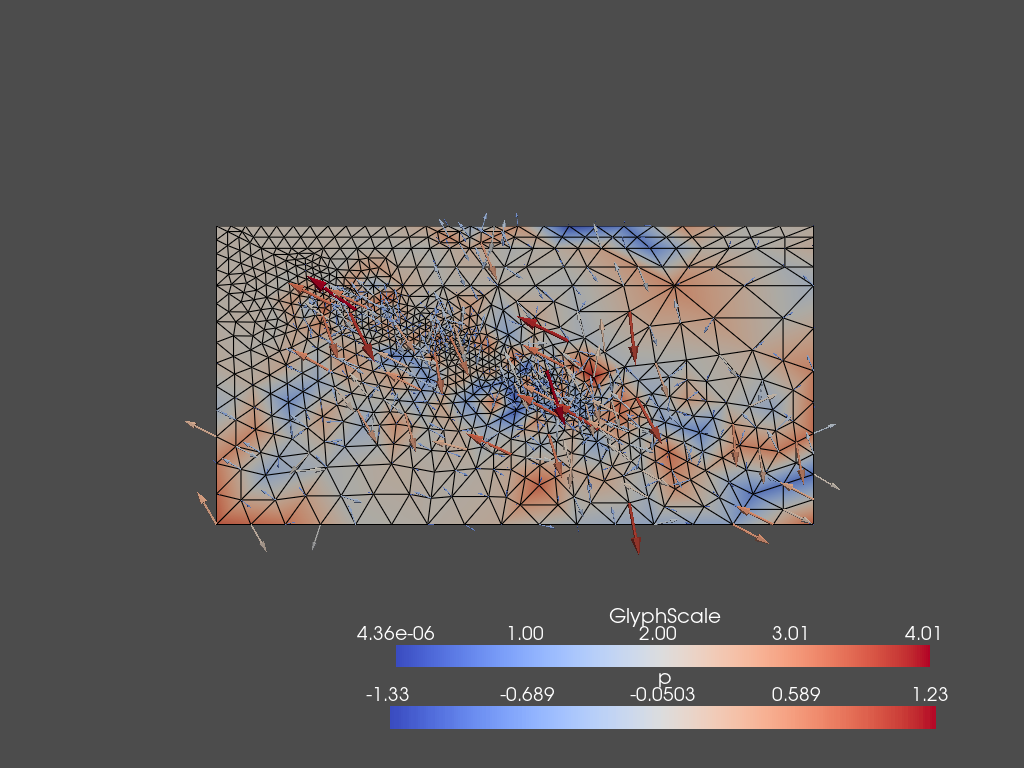

In [41]:
import pyvista
from dolfinx.plot import create_vtk_mesh
import matplotlib.pyplot as plt

pyvista.start_xvfb()
topology, cell_types, geometry = create_vtk_mesh(Vs0)
values = np.zeros((geometry.shape[0], 3), dtype=np.float64)
values[:, :len(v)] = v.x.array.real.reshape((geometry.shape[0], len(v)))

# Create a point cloud of glyphs
function_grid = pyvista.UnstructuredGrid(topology, cell_types, geometry)
function_grid["v"] = values
glyphs = function_grid.glyph(orient="v", factor=10.0)

# create a scalar field on the P2 element
p_p2 = Function(Vs00)
# and interpolate the pressure onto it
p_p2.interpolate(p)
# then put that pressure onto the function_grid
function_grid["p"] = p_p2.x.array.real
function_grid.set_active_scalars("p")

# Create plotter
plotter = pyvista.Plotter()
plotter.add_mesh(function_grid, show_edges=True, cmap='coolwarm')
plotter.add_mesh(glyphs, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    plotter.savefig('Vel_Pressurefield2.pdf', format='pdf', dpi=600, bbox_inches='tight')

In [63]:

zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Kw = ufl.inner(ufl.sym(ufl.grad(v_tw)), 2*ufl.sym(ufl.grad(v_aw)))*ufl.dx(2) 
Gw = -ufl.div(v_tw)*p_aw*ufl.dx(2)
Dw = -p_tw*ufl.div(v_aw)*ufl.dx(2)
Sw = Kw + Gw + Dw

fw = zero_c * v_tw[0] * ufl.dx(2)
problem_vw = dolfinx.fem.petsc.LinearProblem(Sw, fw, bcs=[bc_slab_w, bc_NonSlab_Vw0], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
vw_i = problem_vw.solve()

Error: error code 73
[0] KSPSolve() at /Users/runner/miniforge3/conda-bld/petsc_1677583100463/work/src/ksp/ksp/interface/itfunc.c:1071
[0] KSPSolve_Private() at /Users/runner/miniforge3/conda-bld/petsc_1677583100463/work/src/ksp/ksp/interface/itfunc.c:825
[0] KSPSetUp() at /Users/runner/miniforge3/conda-bld/petsc_1677583100463/work/src/ksp/ksp/interface/itfunc.c:406
[0] PCSetUp() at /Users/runner/miniforge3/conda-bld/petsc_1677583100463/work/src/ksp/pc/interface/precon.c:994
[0] PCSetUp_LU() at /Users/runner/miniforge3/conda-bld/petsc_1677583100463/work/src/ksp/pc/impls/factor/lu/lu.c:87
[0] MatLUFactorSymbolic() at /Users/runner/miniforge3/conda-bld/petsc_1677583100463/work/src/mat/interface/matrix.c:3171
[0] MatLUFactorSymbolic_SeqAIJ() at /Users/runner/miniforge3/conda-bld/petsc_1677583100463/work/src/mat/impls/aij/seq/aijfact.c:300
[0] Object is in wrong state
[0] Matrix is missing diagonal entry 0

In [ ]:
geom.wedge_side_sid